# Loading and Setting up Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import os
import datetime as dt
import statsmodels.api as sm

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

ImportError: this version of pandas is incompatible with numpy < 1.17.3
your numpy version is 1.16.5.
Please upgrade numpy to >= 1.17.3 to use this pandas version

In [2]:
import sys

In [3]:
sys.path

['C:\\Users\\NORRIKA',
 'C:\\Users\\NORRIKA\\AppData\\Local\\Continuum\\anaconda3\\python37.zip',
 'C:\\Users\\NORRIKA\\AppData\\Local\\Continuum\\anaconda3\\DLLs',
 'C:\\Users\\NORRIKA\\AppData\\Local\\Continuum\\anaconda3\\lib',
 'C:\\Users\\NORRIKA\\AppData\\Local\\Continuum\\anaconda3',
 '',
 'C:\\Users\\NORRIKA\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\NORRIKA\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages',
 'C:\\Users\\NORRIKA\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\NORRIKA\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\NORRIKA\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\NORRIKA\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\NORRIKA\\.ipython']

In [ ]:
os.getcwd()
os.chdir(r'C:\Users\NORRIKA\OneDrive - Key Corp\Documents\Project')

In [ ]:
pd.read_csv('BondSignalData.csv')
data = pd.read_csv('BondSignalData.csv')

In [ ]:
data['rqdatetime'] = pd.to_datetime(data.request_time)
data['rfqdate']=data['rqdatetime'].dt.date

data['year']=pd.to_datetime(data.request_time).dt.year
data['month']=data.rqdatetime.dt.month
data['day']=pd.to_datetime(data.request_time).dt.day
data['hour']=pd.to_datetime(data.request_time).dt.hour
data['minute']=pd.to_datetime(data.request_time).dt.minute
data['day']= data['day'].apply(lambda x: '{0:0>2}'.format(x)) #turning day to two digits so 1-04 comes before 1-11
data['month_day']= (data['month'].astype(str) + "-" + data['day'].astype(str)) #putting month & day together
data['month'] = data['month'].replace(4, 3) #as only have one day of data in April

data['signal1dailyavg'] = data.groupby(['rfqdate'])['signal1'].transform('mean')
data['signal2dailyavg'] = data.groupby(['rfqdate'])['signal2'].transform('mean')
data['signal3dailyavg'] = data.groupby(['rfqdate'])['signal3'].transform('mean')
data['move1Ddailyavg'] = data.groupby(['rfqdate'])['move_1D'].transform('mean')
data['move3Ddailyavg'] = data.groupby(['rfqdate'])['move_3D'].transform('mean')

data['bondlength'] = data.mat_bucket.str.strip("B")
data['bondlength']=data.bondlength.astype(int)

#for regression
data['sig3equal1'] = data['signal3'].apply(lambda x: 1 if x >= 1 else 0)
data['sig3equalneg1'] = data['signal3'].apply(lambda x: 1 if x <= -1 else 0)

# Exploring relationships between variables

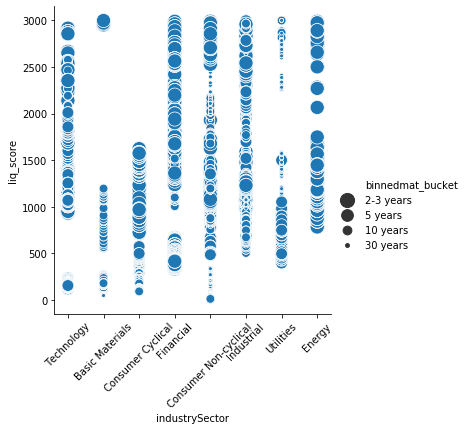

In [80]:
sns.relplot(x="industrySector", y="liq_score", size="binnedmat_bucket", sizes=(15,200), data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

In [1]:
sns.relplot(x="industrySector", y="liq_score", size="binnedmat_bucket", sizes=(15,200),data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

NameError: name 'sns' is not defined

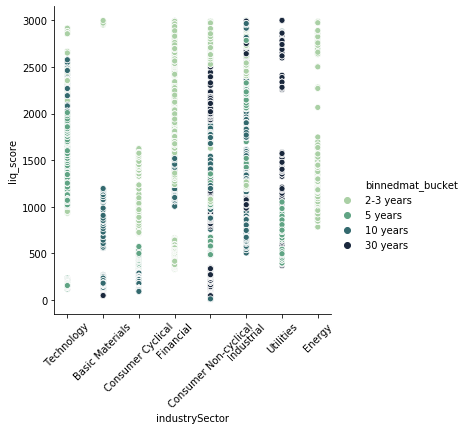

In [88]:
sns.relplot(x="industrySector", y="liq_score", hue="binnedmat_bucket", palette="ch:r=-.5,l=.75", data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

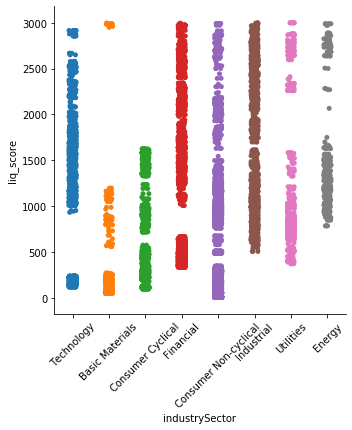

In [53]:
sns.catplot(x="industrySector", y="liq_score", data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

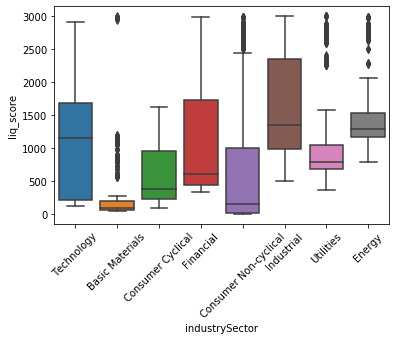

In [57]:
sns.boxplot(x="industrySector", y="liq_score", data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

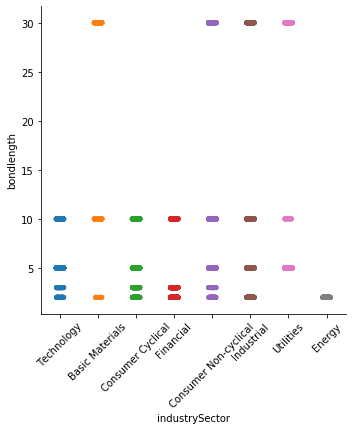

In [54]:
sns.catplot(x="industrySector", y="bondlength", data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

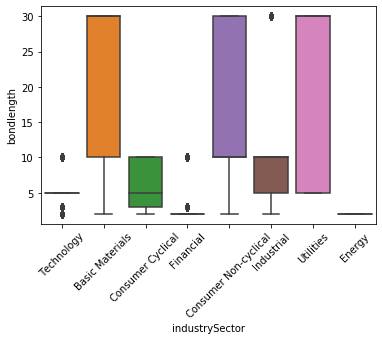

In [56]:
sns.boxplot(x="industrySector", y="bondlength", data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

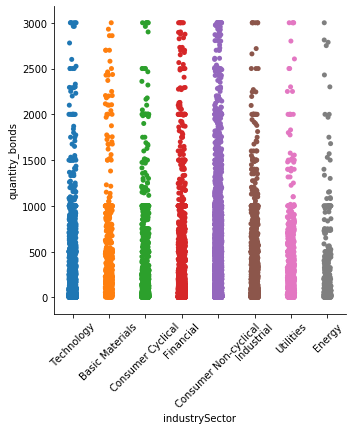

In [60]:
sns.catplot(x="industrySector", y="quantity_bonds", data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

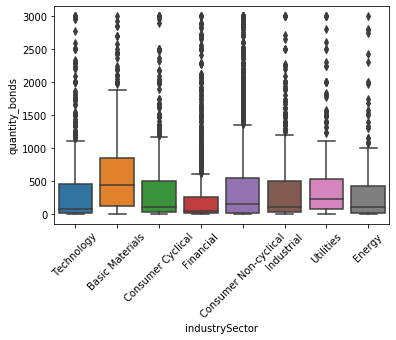

In [59]:
sns.boxplot(x="industrySector", y="quantity_bonds", data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

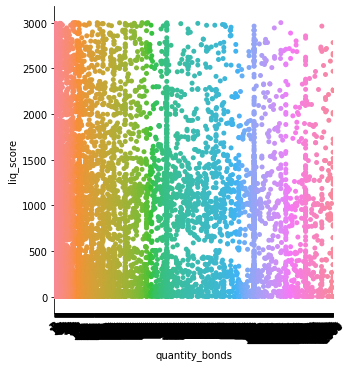

In [61]:
sns.catplot(x="quantity_bonds", y="liq_score", data=data)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=45)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple bond maturities')

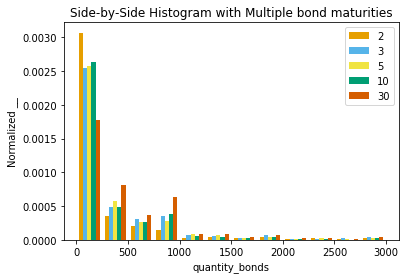

In [62]:
x1 = list(data[data['bondlength'] == 2]['quantity_bonds'])
x2 = list(data[data['bondlength'] == 3]['quantity_bonds'])
x3 = list(data[data['bondlength'] == 5]['quantity_bonds'])
x4 = list(data[data['bondlength'] == 10]['quantity_bonds'])
x5 = list(data[data['bondlength'] == 30]['quantity_bonds'])

colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
bondlengths = [2,3,5,10,30]
plt.hist([x1, x2, x3, x4, x5], bins = int(12/1), normed=True,
         color = colors, label=bondlengths)

plt.legend()
plt.xlabel('quantity_bonds')
plt.ylabel('Normalized __')
plt.title('Side-by-Side Histogram with Multiple bond maturities')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple bond maturities')

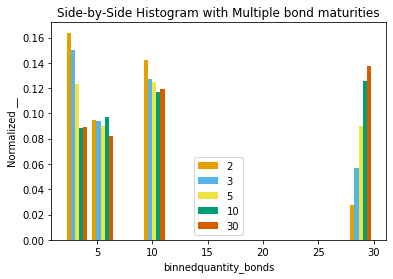

In [65]:
x1 = list(data[data['binnedquantity_bonds'] == '1-12']['bondlength'])
x2 = list(data[data['binnedquantity_bonds'] == '12-50']['bondlength'])
x3 = list(data[data['binnedquantity_bonds'] == '50-210']['bondlength'])
x4 = list(data[data['binnedquantity_bonds'] =='210-600']['bondlength'])
x5 = list(data[data['binnedquantity_bonds'] == '600-3000']['bondlength'])

colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
binnedquantity_bonds = ['1-12', '12-50', '50-210', '210-600', '600-3000'] #this needs to be fixed
plt.hist([x1, x2, x3, x4, x5], bins = int(12/1), normed=True,
         color = colors, label=bondlengths)

plt.legend()
plt.xlabel('binnedquantity_bonds')
plt.ylabel('Normalized __')
plt.title('Side-by-Side Histogram with Multiple bond maturities')

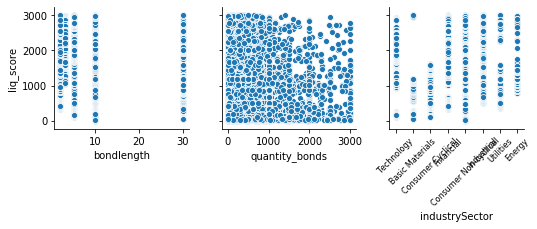

In [69]:
g = sns.pairplot(data, 
                 x_vars=["bondlength","quantity_bonds","industrySector"],
                 y_vars=["liq_score"])
plt.tick_params(axis='x', which='major', labelsize=8, rotation=45)
plt.show()

# Exploring with Graphs

I started playing around with some graphs to get used to Python and I fell across these two below. From here, I started to see a positive correlatioon between signal3 and move_1d data and decided to dive a little deeper into their relationship.

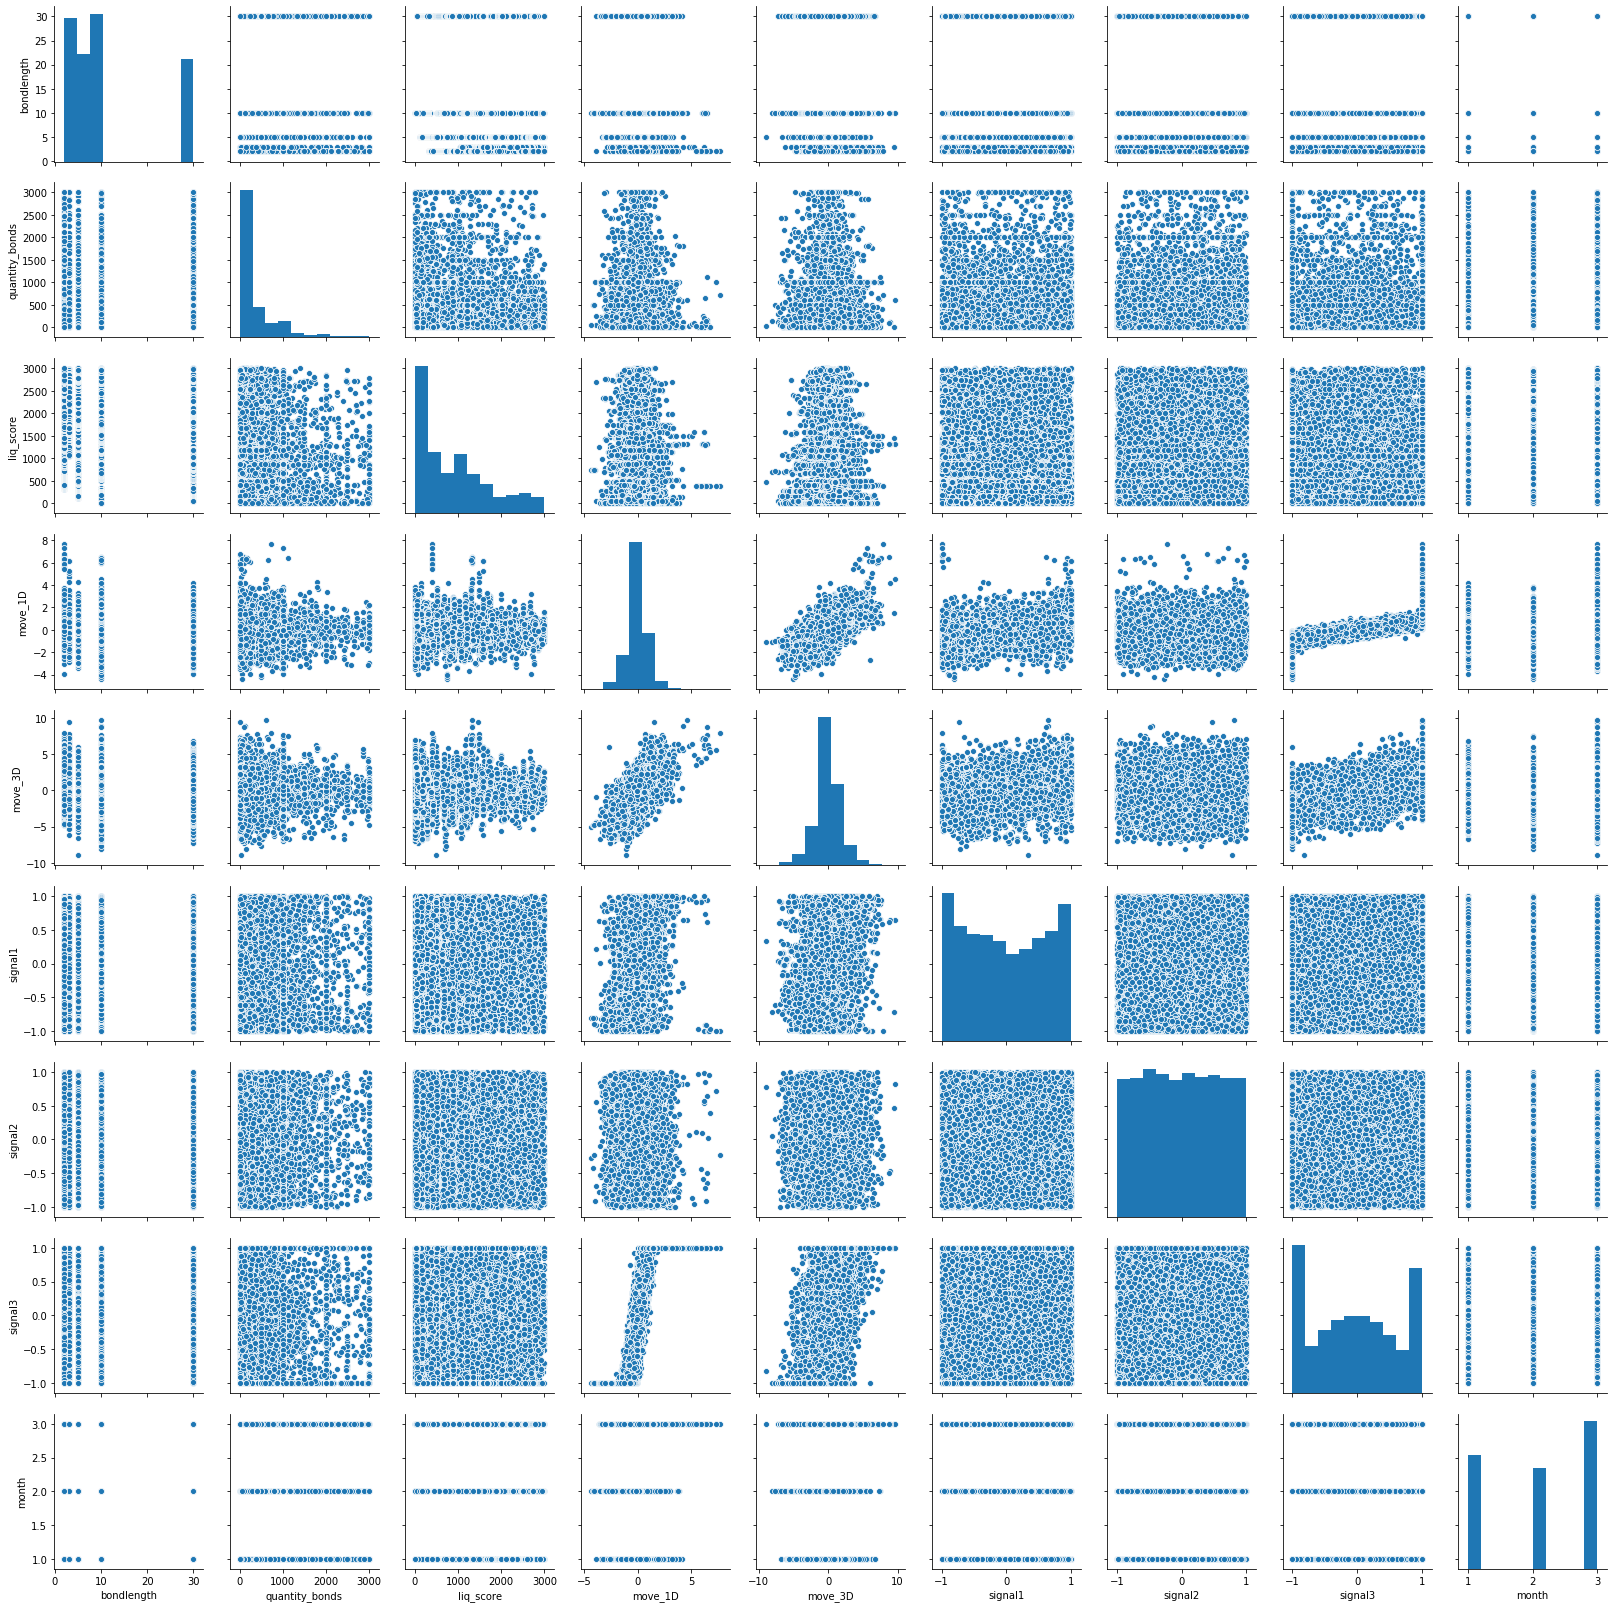

In [20]:
sns.pairplot(data[['cusip','industrySector','ticker','bondlength', 'quantity_bonds','liq_score','move_1D','move_3D','signal1', 'signal2', 'signal3','rqdatetime','month']])

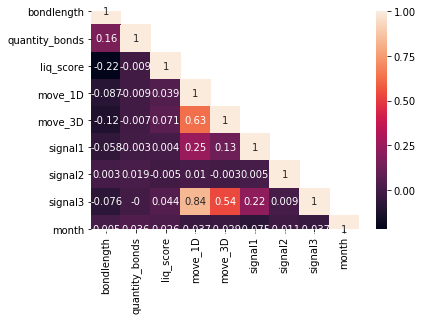

In [10]:
mask = np.triu(np.ones_like(data[['cusip','industrySector','ticker','bondlength', 'quantity_bonds','liq_score','move_1D','move_3D','signal1', 'signal2', 'signal3','rqdatetime','month']].corr(), dtype=bool))
np.fill_diagonal(mask, False)
matrix = data[['cusip','industrySector','ticker','bondlength', 'quantity_bonds','liq_score','move_1D','move_3D','signal1', 'signal2', 'signal3','rqdatetime','month']].corr().round(3)
sns.heatmap(matrix, mask=mask, annot=True)
plt.show()

# SIG3 MOVE_1D

I liked how this graph combined the two varaiables to see their rather positive relationship but also showed their indiviudal distribution plots below.

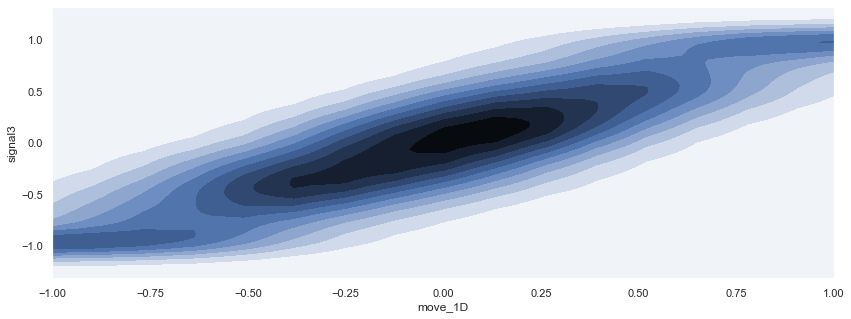

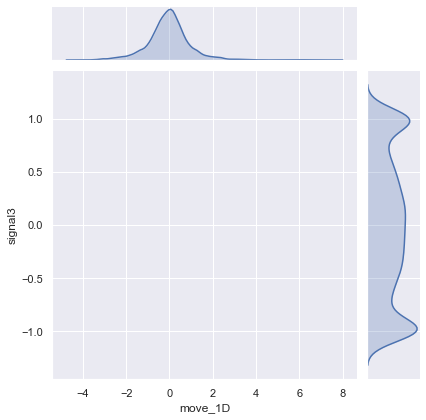

In [35]:
fig, ax = plt.subplots()
sns.jointplot(x=data['move_1D'], y= data['signal3'], kind ='kde', ax=ax)
ax.set_xlim(-1,1)
ax.set_ylabel('signal3')
ax.set_xlabel('move_1D')
plt.show()

The illustration above gave light to the interstinf distribution of signal3 so the following graph enlarges that indiciual distribution image.

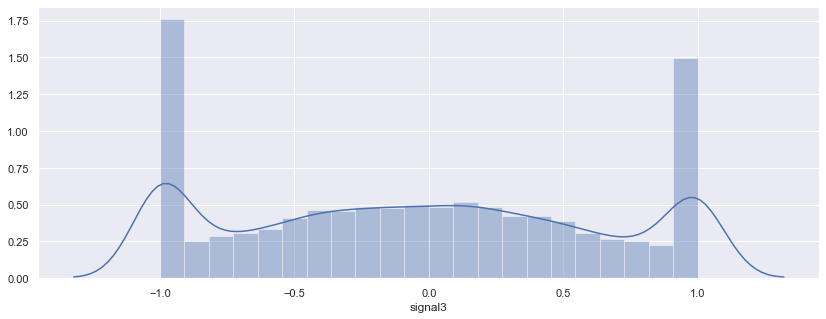

In [36]:
sns.distplot(data['signal3'])

I started binning varaiables starting with signal3 as the graph above showcased an interesting distribution with the ends containing a lot of data and the middle resmebling a normal distribution. These bins then i could use to look at the move_1D in that specific bucket.

In [85]:
#SIGNAL3   1=[-1.25, -0.75)  2=[-0.75, -0.75)  3=[0.75, 1.25]
bins = [-1.25, -0.75, 0.75, 1.25]
data['binnedsig3'] = pd.cut(data['signal3'], bins, labels = [1,2,3])
data.head()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,move1Ddailyavg,move3Ddailyavg,bondlength,sig3equal1,sig3equalneg1,binnedquantity_bonds,binnedliq_score,binnedmat_bucket,binnedsig3,binnedsig1
0,1/4/2021 8:32,594918BY9,3000,170,B05,Technology,MSFT,0.139226,-1.705008,0.000000,...,0.906754,-0.052968,5,1,0,600-3000,2,5 years,3,2
1,1/4/2021 12:58,37331NAK7,50,558,B10,Basic Materials,GP,0.169077,0.622054,0.790123,...,0.906754,-0.052968,10,0,0,12-50,4,10 years,2,4
2,1/4/2021 12:58,37331NAK7,50,558,B10,Basic Materials,GP,0.169077,0.622054,0.790123,...,0.906754,-0.052968,10,0,0,12-50,4,10 years,2,4
3,1/4/2021 13:07,500255AU8,50,347,B05,Consumer Cyclical,KSS,-1.917058,-2.578685,0.085106,...,0.906754,-0.052968,5,0,1,12-50,3,5 years,1,3
4,1/4/2021 13:14,594918BY9,80,170,B05,Technology,MSFT,0.190731,-1.134894,-0.708861,...,0.906754,-0.052968,5,0,0,50-210,2,5 years,2,1


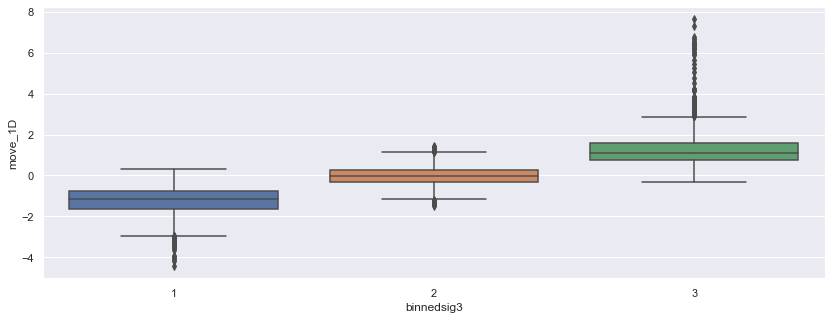

In [79]:
sns.boxplot(x=data['binnedsig3'], y=data['move_1D'])

the positive correlation between these two varaiables is certainly present above.  

In [80]:
data['move_1D'].corr(data['binnedsig3']==1)

-0.628979290407523

In [81]:
data['move_1D'].corr(data['binnedsig3']==2)

0.030921153029121348

In [39]:
data['move_1D'].corr(data['binnedsig3']==3)

0.627298388370072

# Regression

In [29]:
x = data[['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.365e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:36:01   Log-Likelihood:                -8400.5
No. Observations:               12499   AIC:                         1.681e+04
Df Residuals:                   12495   BIC:                         1.684e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0090      0.005     -1.826

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


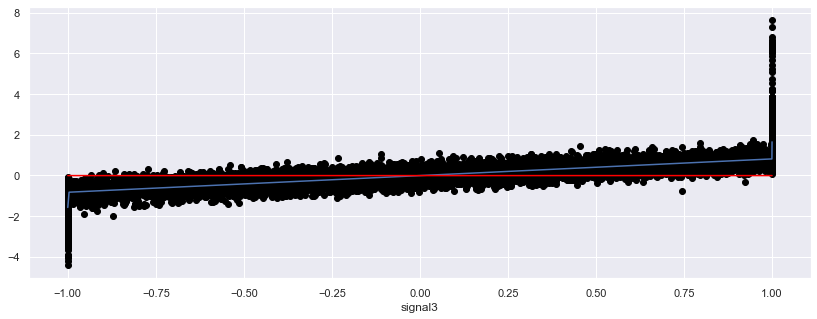

In [86]:
sns.lineplot(x = data['signal3'], y=predictions)
sns.lineplot(x = data['signal3'], y=model.params[0], color = 'red')
plt.scatter(data['signal3'],data['move_1D'], color = 'black')

# Exploring predictors/features that help the signal

Next, I transitioned into looking at features/characteristics that may help signal3 predict the move_1D data. Liquidity score and bond quantity had right skewed distributions so I started exploring those features and buckets first as shown below. 

### Liquidiity Score 

(array([1.69716614e-03, 7.38797843e-04, 5.49927211e-04, 5.69281445e-04,
        3.47708831e-04, 2.69624506e-04, 2.98322164e-04, 3.35028471e-04,
        4.81853697e-04, 4.58495138e-04, 3.31691534e-04, 2.87643966e-04,
        2.25576938e-04, 2.38257299e-04, 1.82196758e-04, 1.28805767e-04,
        9.20994600e-05, 1.87535857e-04, 1.48160001e-04, 9.67711718e-05,
        1.34144866e-04, 1.66846848e-04, 1.52831713e-04, 1.14123244e-04,
        1.08784145e-04]),
 array([   3.  ,  122.88,  242.76,  362.64,  482.52,  602.4 ,  722.28,
         842.16,  962.04, 1081.92, 1201.8 , 1321.68, 1441.56, 1561.44,
        1681.32, 1801.2 , 1921.08, 2040.96, 2160.84, 2280.72, 2400.6 ,
        2520.48, 2640.36, 2760.24, 2880.12, 3000.  ]),
 <a list of 25 Patch objects>)

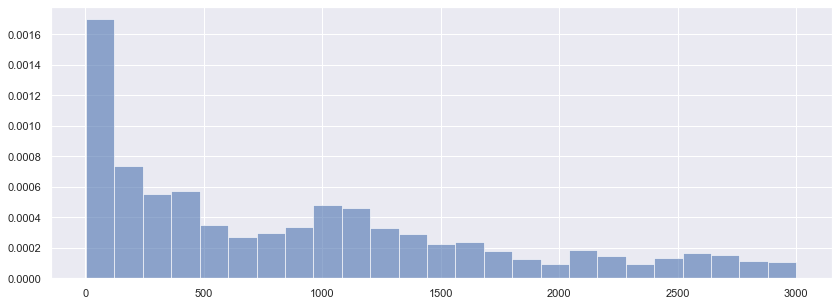

In [40]:
plt.hist(data['liq_score'], bins=25, density=True, alpha=0.6, color='b')

In [7]:
#LIQUIDITY SCORE --labels: 1=(2.999, 12.0] 2=(12.0, 182.0] 3=(182.0, 399.0] 4=(399.0, 719.0] 5=(719.0, 1065.0] 6=(1065.0, 1394.0] 7=(1394.0, 2087.0] 8=(2087.0, 3000.0]
data['binnedliq_score']= pd.qcut(data['liq_score'], q=8, labels=[1,2,3,4,5,6,7,8])
data.groupby(['binnedliq_score']).count()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,month_day,signal1dailyavg,signal2dailyavg,signal3dailyavg,move1Ddailyavg,move3Ddailyavg,bondlength,sig3equal1,sig3equalneg1,binnedquantity_bonds
binnedliq_score,,,,,,,,,,,,,,,,,,,,,
1,1587,1587,1587,1587,1587,1587,1587,1587,1587,1587,...,1587,1587,1587,1587,1587,1587,1587,1587,1587,1587
2,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,...,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540
3,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,...,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565
4,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560,...,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560
5,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563,...,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563
6,1570,1570,1570,1570,1570,1570,1570,1570,1570,1570,...,1570,1570,1570,1570,1570,1570,1570,1570,1570,1570
7,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553,...,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553
8,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561,...,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561


In [18]:
data['binnedliq_score']= pd.qcut(data['liq_score'], q=8, labels=[1,2,3,4,5,6,7,8])
labels=[1,2,3,4,5,6,7,8]
for i in labels:
    x = data[data['binnedliq_score']==i][['signal3', 'sig3equal1', 'sig3equalneg1']]
    y = data[data['binnedliq_score']==i]['move_1D']

    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    
    variable_coefs = model.params
    confidence_interval= model.conf_int(alpha=0.05)
    p_values= model.pvalues
    r_squared= model.rsquared
    
    sub_df = pd.DataFrame()
    sub_df['features'] = ['const', 'signal3','sig3equal1', 'sig3equalneg1']
    sub_df.set_index('features', inplace=True)
    sub_df['coef'] = list(variable_coefs)
    sub_df['conf_a'] = list(confidence_interval[0])
    sub_df['conf_b'] = list(confidence_interval[1])
    sub_df['p_values'] = list(p_values)
    sub_df['r_squared'] = r_squared
    
    print('bin', i)
    print(sub_df)
    print('-------------')  

bin 1
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const          0.004813 -0.026798  0.036423   7.652596e-01   0.834507
signal3        0.892338  0.834194  0.950482  8.579137e-158   0.834507
sig3equal1     0.902180  0.810174  0.994186   2.975407e-74   0.834507
sig3equalneg1 -0.783716 -0.866746 -0.700685   1.996706e-69   0.834507
-------------
bin 2
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const         -0.006976 -0.039420  0.025468   6.732600e-01   0.819755
signal3        0.848763  0.787669  0.909857  1.024850e-133   0.819755
sig3equal1     0.759071  0.662730  0.855412   3.428333e-50   0.819755
sig3equalneg1 -0.838167 -0.923636 -0.752699   4.714629e-74   0.819755
-------------
bin 3
                   coef    conf_a    conf_b       p_values  r_squared
features                                    

### Quantity of Bonds 

After looking at the regressions of the different buckets, I did not find this variable to have suffifient data to prove that it helps signal3 predict the move_1D data.

(array([8282., 1721.,  820.,  939.,  223.,  119.,  175.,   58.,   71.,
          91.]),
 array([1.0000e+00, 3.0090e+02, 6.0080e+02, 9.0070e+02, 1.2006e+03,
        1.5005e+03, 1.8004e+03, 2.1003e+03, 2.4002e+03, 2.7001e+03,
        3.0000e+03]),
 <a list of 10 Patch objects>)

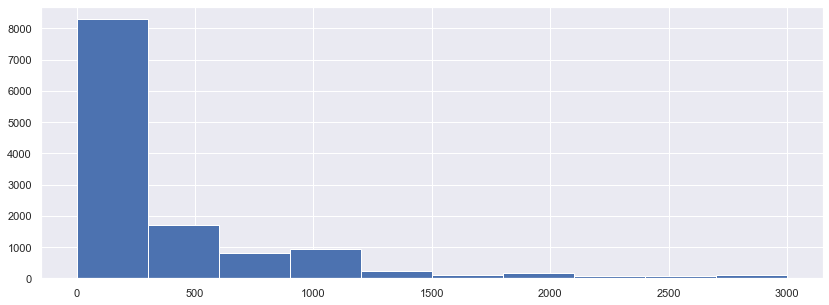

In [57]:
plt.hist(data['quantity_bonds'])

In [75]:
#BOND QUANTITY
data['binnedquantity_bonds']= pd.qcut(data['quantity_bonds'], q=5, labels=['1-12', '12-50', '50-210', '210-600', '600-3000'])
data.groupby(['binnedquantity_bonds']).count()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,signal3dailyavg,move1Ddailyavg,move3Ddailyavg,bondlength,sig3equal1,sig3equalneg1,binnedliq_score,binnedmat_bucket,binnedsig3,binnedsig1
binnedquantity_bonds,,,,,,,,,,,,,,,,,,,,,
1-12,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504,...,2504,2504,2504,2504,2504,2504,2504,2504,2504,2496
12-50,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,...,2536,2536,2536,2536,2536,2536,2536,2536,2536,2525
50-210,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461,...,2461,2461,2461,2461,2461,2461,2461,2461,2461,2445
210-600,2502,2502,2502,2502,2502,2502,2502,2502,2502,2502,...,2502,2502,2502,2502,2502,2502,2502,2502,2502,2484
600-3000,2496,2496,2496,2496,2496,2496,2496,2496,2496,2496,...,2496,2496,2496,2496,2496,2496,2496,2496,2496,2482


In [19]:
data['binnedquantity_bonds']= pd.qcut(data['quantity_bonds'], q=5, labels=['1-12', '12-50', '50-210', '210-600', '600-3000'])
labels=['1-12', '12-50', '50-210', '210-600', '600-3000']
for i in labels:
    x = data[data['binnedquantity_bonds']==i][['signal3', 'sig3equal1', 'sig3equalneg1']]
    y = data[data['binnedquantity_bonds']==i]['move_1D']

    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    
    variable_coefs = model.params
    confidence_interval= model.conf_int(alpha=0.05)
    p_values= model.pvalues
    r_squared= model.rsquared
    
    sub_df = pd.DataFrame()
    sub_df['features'] = ['const', 'signal3','sig3equal1', 'sig3equalneg1']
    sub_df.set_index('features', inplace=True)
    sub_df['coef'] = list(variable_coefs)
    sub_df['conf_a'] = list(confidence_interval[0])
    sub_df['conf_b'] = list(confidence_interval[1])
    sub_df['p_values'] = list(p_values)
    sub_df['r_squared'] = r_squared
    
    print('bin', i)
    print(sub_df)
    print('-------------')  

bin 1-12
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const          0.016797 -0.003002  0.036597   9.631529e-02   0.760347
signal3        0.786554  0.745946  0.827162  1.299161e-249   0.760347
sig3equal1     0.699173  0.629712  0.768635   1.043061e-80   0.760347
sig3equalneg1 -0.707924 -0.775251 -0.640598   2.315324e-87   0.760347
-------------
bin 12-50
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const         -0.015338 -0.036337  0.005662   1.522102e-01   0.752056
signal3        0.773364  0.731322  0.815407  2.805906e-230   0.752056
sig3equal1     0.841798  0.766989  0.916608   7.883903e-99   0.752056
sig3equalneg1 -0.761384 -0.830777 -0.691990   1.955162e-94   0.752056
-------------
bin 50-210
                   coef    conf_a    conf_b       p_values  r_squared
features                        

In [ ]:
plt.scatter()

### Maturity of Bond 

I did however find data highlighting the importance of the maturity of the bond. Bond maturity is most helpful to signal3 in predicting move_1D movement with a 30 yaer bond, at a greater maturity than bonds with a lower maturity age 

In [8]:
#MATURITY
data['binnedmat_bucket']= pd.qcut(data['bondlength'], q=4,  labels=['2-3 years', '5 years', '10 years', '30 years'])
data.groupby(['binnedmat_bucket']).count()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,signal1dailyavg,signal2dailyavg,signal3dailyavg,move1Ddailyavg,move3Ddailyavg,bondlength,sig3equal1,sig3equalneg1,binnedquantity_bonds,binnedliq_score
binnedmat_bucket,,,,,,,,,,,,,,,,,,,,,
2-3 years,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,...,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590
5 years,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,...,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
10 years,3684,3684,3684,3684,3684,3684,3684,3684,3684,3684,...,3684,3684,3684,3684,3684,3684,3684,3684,3684,3684
30 years,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,...,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554


In [ ]:
plt.scatter()

In [20]:
data['binnedmat_bucket']= pd.qcut(data['bondlength'], q=4,  labels=['2-3 years', '5 years', '10 years', '30 years'])
labels=['2-3 years', '5 years', '10 years', '30 years']
for i in labels:
    x = data[data['binnedmat_bucket']==i][['signal3', 'sig3equal1', 'sig3equalneg1']]
    y = data[data['binnedmat_bucket']==i]['move_1D']

    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    
    variable_coefs = model.params
    confidence_interval= model.conf_int(alpha=0.05)
    p_values= model.pvalues
    r_squared= model.rsquared
    
    sub_df = pd.DataFrame()
    sub_df['features'] = ['const', 'signal3','sig3equal1', 'sig3equalneg1']
    sub_df.set_index('features', inplace=True)
    sub_df['coef'] = list(variable_coefs)
    sub_df['conf_a'] = list(confidence_interval[0])
    sub_df['conf_b'] = list(confidence_interval[1])
    sub_df['p_values'] = list(p_values)
    sub_df['r_squared'] = r_squared
    
    print('bin', i)
    print(sub_df)
    print('-------------')  

bin 2-3 years
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const         -0.009115 -0.025946  0.007717   2.884313e-01   0.653288
signal3        0.733074  0.698008  0.768141  1.512398e-301   0.653288
sig3equal1     0.865465  0.800455  0.930476  1.199099e-137   0.653288
sig3equalneg1 -0.419815 -0.490284 -0.349346   5.804644e-31   0.653288
-------------
bin 5 years
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const          0.001126 -0.015233  0.017486  8.926067e-01   0.781555
signal3        0.804305  0.771286  0.837324  0.000000e+00   0.781555
sig3equal1     0.528186  0.470377  0.585994  7.207397e-68   0.781555
sig3equalneg1 -0.600646 -0.658492 -0.542801  8.906015e-86   0.781555
-------------
bin 10 years
                   coef    conf_a    conf_b       p_values  r_squared
features                     

### Industry Sector 

Some sectors seem to be better at aiding signal3 in predciitng move_1D data. Finanical Sector bonds are definitely the worst group. 

In [21]:
industrySector=['Technology', 'Basic Materials', 'Consumer Cyclical', 'Financial',
       'Consumer Non-cyclical', 'Industrial', 'Utilities', 'Energy']
for i in industrySector:
    x = data[data['industrySector']==i][['signal3', 'sig3equal1', 'sig3equalneg1']]
    y = data[data['industrySector']==i]['move_1D']

    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    
    variable_coefs = model.params
    confidence_interval= model.conf_int(alpha=0.05)
    p_values= model.pvalues
    r_squared= model.rsquared
    
    sub_df = pd.DataFrame()
    sub_df['features'] = ['const', 'signal3','sig3equal1', 'sig3equalneg1']
    sub_df.set_index('features', inplace=True)
    sub_df['coef'] = list(variable_coefs)
    sub_df['conf_a'] = list(confidence_interval[0])
    sub_df['conf_b'] = list(confidence_interval[1])
    sub_df['p_values'] = list(p_values)
    sub_df['r_squared'] = r_squared
    
    print(i)
    print(sub_df)
    print('-------------')  

Technology
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const         -0.000721 -0.021088  0.019646   9.446695e-01   0.790608
signal3        0.812364  0.770761  0.853968  6.977274e-229   0.790608
sig3equal1     0.558553  0.486365  0.630741   9.823450e-49   0.790608
sig3equalneg1 -0.526302 -0.598286 -0.454318   5.425180e-44   0.790608
-------------
Basic Materials
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const          0.002632 -0.050383  0.055648  9.223330e-01   0.822858
signal3        0.783291  0.682559  0.884023  7.890845e-44   0.822858
sig3equal1     0.862066  0.692688  1.031444  1.175732e-21   0.822858
sig3equalneg1 -1.024308 -1.165422 -0.883194  3.283377e-39   0.822858
-------------
Consumer Cyclical
                   coef    conf_a    conf_b       p_values  r_squared
features               

### Ticker 

In [22]:
ticker=['MSFT', 'GP', 'KSS', 'DOW', 'JPM', 'COST', 'RY', 'CVS', 'TFC',
       'RSG', 'BA', 'PNC', 'AMGN', 'PCG', 'GM', 'GLENLN', 'MRK', 'PYPL',
       'MS', 'PKI', 'VLO', 'BK', 'LMT', 'CAG', 'VMW', 'HUM', 'NEE',
       'KEYS', 'DE', 'CSX', 'ROP', 'MKL', 'UDR', 'PFE', 'WMB', 'KDP',
       'DXC', 'VST', 'TSN', 'NSC', 'GE', 'DUK', 'BAYNGR', 'SRC', 'KMI',
       'O', 'FBHS', 'QCOM', 'AIG', 'XEL', 'CAT', 'MCO', 'BNSF']
for i in ticker:
    x = data[data['ticker']==i][['signal3', 'sig3equal1', 'sig3equalneg1']]
    y = data[data['ticker']==i]['move_1D']

    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    
    variable_coefs = model.params
    confidence_interval= model.conf_int(alpha=0.05)
    p_values= model.pvalues
    r_squared= model.rsquared
    
    sub_df = pd.DataFrame()
    sub_df['features'] = ['const', 'signal3','sig3equal1', 'sig3equalneg1']
    sub_df.set_index('features', inplace=True)
    sub_df['coef'] = list(variable_coefs)
    sub_df['conf_a'] = list(confidence_interval[0])
    sub_df['conf_b'] = list(confidence_interval[1])
    sub_df['p_values'] = list(p_values)
    sub_df['r_squared'] = r_squared
    
    print(i)
    print(sub_df)
    print('-------------')  

MSFT
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const          0.004438 -0.019816  0.028692   7.196362e-01    0.79438
signal3        0.833542  0.784127  0.882957  2.392009e-167    0.79438
sig3equal1     0.437715  0.348578  0.526853   3.769185e-21    0.79438
sig3equalneg1 -0.524772 -0.606755 -0.442789   6.547464e-34    0.79438
-------------
GP
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const          0.033859 -0.041502  0.109220  3.735608e-01   0.744532
signal3        0.732138  0.588286  0.875990  1.203472e-15   0.744532
sig3equal1     0.298856 -0.098356  0.696068  1.380866e-01   0.744532
sig3equalneg1 -0.443645 -0.740966 -0.146325  3.976170e-03   0.744532
-------------
KSS
                   coef    conf_a    conf_b      p_values  r_squared
features                                                 

DE
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const          0.015841 -0.031175  0.062856  5.073400e-01   0.708147
signal3        0.661420  0.561303  0.761537  5.796855e-29   0.708147
sig3equal1     0.247933  0.068023  0.427844  7.138652e-03   0.708147
sig3equalneg1 -0.502385 -0.701209 -0.303560  1.301488e-06   0.708147
-------------
CSX
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const         -0.003700 -0.048225  0.040825  8.700426e-01    0.81378
signal3        0.741008  0.653411  0.828605  1.296751e-40    0.81378
sig3equal1     0.526775  0.354453  0.699097  7.239157e-09    0.81378
sig3equalneg1 -0.528018 -0.693806 -0.362230  1.872260e-09    0.81378
-------------
ROP
                   coef    conf_a    conf_b      p_values  r_squared
features                                                        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1376: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale



-------------
KMI
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const         -0.076792 -0.166809  0.013225  9.294522e-02   0.728781
signal3        0.801913  0.626684  0.977142  1.315140e-12   0.728781
sig3equal1     0.252540 -0.169795  0.674874  2.358242e-01   0.728781
sig3equalneg1 -0.042562 -0.413013  0.327888  8.186916e-01   0.728781
-------------
O
                   coef    conf_a    conf_b  p_values  r_squared
features                                                        
const          0.064555 -0.213192  0.342302  0.553876   0.744805
signal3        0.656141  0.122964  1.189319  0.026860   0.744805
sig3equal1     0.000000  0.000000  0.000000       NaN   0.744805
sig3equalneg1  0.000000  0.000000  0.000000       NaN   0.744805
-------------
FBHS
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
cons

# Month

Looked at if the month had any significance in helping signal3 predict move_1D data. no real significance found. all signal3 coeff are relatively the same each month.

In [26]:
data.month.sort_values().unique()

array([1, 2, 3], dtype=int64)

In [34]:
month=[1,2,3]
for i in month:
    x = data[data['month']==i][['signal3', 'sig3equal1', 'sig3equalneg1']]
    y = data[data['month']==i]['move_1D']

    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    
    variable_coefs = model.params
    confidence_interval= model.conf_int(alpha=0.05)
    p_values= model.pvalues
    r_squared= model.rsquared
    
    sub_df = pd.DataFrame()
    sub_df['features'] = ['const', 'signal3','sig3equal1', 'sig3equalneg1']
    sub_df.set_index('features', inplace=True)
    sub_df['coef'] = list(variable_coefs)
    sub_df['conf_a'] = list(confidence_interval[0])
    sub_df['conf_b'] = list(confidence_interval[1])
    sub_df['p_values'] = list(p_values)
    sub_df['r_squared'] = r_squared
    
    print(i)
    print(sub_df)
    print('-------------')  

1
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const          0.016554  0.002201  0.030907   2.379782e-02   0.788589
signal3        0.801290  0.772742  0.829838   0.000000e+00   0.788589
sig3equal1     0.622609  0.574804  0.670413  3.683048e-133   0.788589
sig3equalneg1 -0.630868 -0.680548 -0.581187  3.874197e-127   0.788589
-------------
2
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const         -0.028379 -0.043258 -0.013501   1.872353e-04   0.766255
signal3        0.777336  0.747223  0.807449   0.000000e+00   0.766255
sig3equal1     0.668525  0.610413  0.726636  2.846546e-105   0.766255
sig3equalneg1 -0.584186 -0.632934 -0.535438  1.899712e-113   0.766255
-------------
3
                   coef    conf_a    conf_b       p_values  r_squared
features                                                

### Day 

In [104]:
data.day.sort_values().unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [16]:
day=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31']
for i in day:
    x = data[data['day']==i][['signal3', 'sig3equal1', 'sig3equalneg1']]
    y = data[data['day']==i]['move_1D']

    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    
    variable_coefs = model.params
    confidence_interval= model.conf_int(alpha=0.05)
    p_values= model.pvalues
    r_squared= model.rsquared
    
    sub_df = pd.DataFrame()
    sub_df['features'] = ['const', 'signal3','sig3equal1', 'sig3equalneg1']
    sub_df.set_index('features', inplace=True)
    sub_df['coef'] = list(variable_coefs)
    sub_df['conf_a'] = list(confidence_interval[0])
    sub_df['conf_b'] = list(confidence_interval[1])
    sub_df['p_values'] = list(p_values)
    sub_df['r_squared'] = r_squared
    
    print(i)
    print(sub_df)
    print('-------------')  

01
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const          0.012036 -0.020038  0.044110  4.614117e-01    0.78509
signal3        0.781887  0.718964  0.844810  7.170507e-91    0.78509
sig3equal1     0.400066  0.281245  0.518886  8.603831e-11    0.78509
sig3equalneg1 -0.607701 -0.722268 -0.493134  2.111764e-23    0.78509
-------------
02
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const          0.002721 -0.032520  0.037962  8.794342e-01   0.711042
signal3        0.758053  0.688812  0.827293  9.908442e-70   0.711042
sig3equal1     0.529607  0.397956  0.661257  2.354921e-14   0.711042
sig3equalneg1 -0.101676 -0.313003  0.109650  3.448285e-01   0.711042
-------------
03
                   coef    conf_a    conf_b      p_values  r_squared
features                                                          

22
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const          0.079450  0.038084  0.120816  1.840513e-04   0.736054
signal3        0.749689  0.665092  0.834286  1.000933e-50   0.736054
sig3equal1     0.544738  0.428634  0.660842  1.808086e-18   0.736054
sig3equalneg1 -0.600416 -0.866918 -0.333914  1.228191e-05   0.736054
-------------
23
                   coef    conf_a    conf_b      p_values  r_squared
features                                                            
const         -0.000772 -0.041618  0.040075  9.704013e-01   0.755237
signal3        0.815065  0.738245  0.891886  1.411320e-67   0.755237
sig3equal1     0.565845  0.415439  0.716250  7.301761e-13   0.755237
sig3equalneg1 -0.318146 -0.456569 -0.179722  8.070882e-06   0.755237
-------------
24
                   coef    conf_a    conf_b      p_values  r_squared
features                                                          

### correlations --not sure I need this anymore, put at beginning of notebook. for beginnign findings and what I was looking at before diving into data. look at correlatoons between other feature varaibles, not just signals and moves

In [12]:
#INDUSTRY SECTOR
industrySector=['Technology', 'Basic Materials', 'Consumer Cyclical', 'Financial',
       'Consumer Non-cyclical', 'Industrial', 'Utilities', 'Energy']
for sector in industrySector:
       print(sector, data[data['industrySector']== sector]['move_1D'].corr(data[data['industrySector']== sector]['signal3']))

Technology 0.863411640938526
Basic Materials 0.8614915910012315
Consumer Cyclical 0.8340054624177463
Financial 0.7374369054049094
Consumer Non-cyclical 0.8683997921541552
Industrial 0.8379156618415927
Utilities 0.8345644736999595
Energy 0.8554225272790689


In [13]:
#BOND MATURITY
bondlength= [2,3,5,10,30]
for bond in bondlength:
    print(bond, data[data['bondlength']== bond]['move_1D'].corr(data[data['bondlength']== bond]['signal3']))

2 0.7517171236656588
3 0.8014770694751802
5 0.8561985882902724
10 0.8473424637196804
30 0.8810715076031818


In [23]:
#BOND QUANTITY
binned_quantity= [1,2,3,4] #1=(-250,250) 2=(250,750) 3=(750,1250) 4=(1250,3000)
for q in binned_quantity:
    print(q, data[data['binned_quantity']== q]['move_1D'].corr(data[data['binned_quantity']== q]['signal3']))

1 0.8309147614701244
2 0.8475256156645352
3 0.8507649083515746
4 0.858997778853357


In [15]:
#TICKER
ticker=['MSFT', 'GP', 'KSS', 'DOW', 'JPM', 'COST', 'RY', 'CVS', 'TFC',
       'RSG', 'BA', 'PNC', 'AMGN', 'PCG', 'GM', 'GLENLN', 'MRK', 'PYPL',
       'MS', 'PKI', 'VLO', 'BK', 'LMT', 'CAG', 'VMW', 'HUM', 'NEE',
       'KEYS', 'DE', 'CSX', 'ROP', 'MKL', 'UDR', 'PFE', 'WMB', 'KDP',
       'DXC', 'VST', 'TSN', 'NSC', 'GE', 'DUK', 'BAYNGR', 'SRC', 'KMI',
       'O', 'FBHS', 'QCOM', 'AIG', 'XEL', 'CAT', 'MCO', 'BNSF']
for t in ticker:
    print(t, data[data['ticker']== t]['move_1D'].corr(data[data['ticker']== t]['signal3']))

MSFT 0.869857512956818
GP 0.8423801028135409
KSS 0.8656441625318033
DOW 0.8967707617548087
JPM 0.6519606433284029
COST 0.8853681111035459
RY 0.7758984914443675
CVS 0.8838651009015546
TFC 0.8358325680299271
RSG 0.8745397347325695
BA 0.8382355168295399
PNC 0.8836356169504036
AMGN 0.8985027981009156
PCG 0.8506714267759801
GM 0.7884307994037035
GLENLN 0.8220802975411727
MRK 0.8923766415283627
PYPL 0.8850943104365062
MS 0.8209896529268601
PKI 0.8282775254449843
VLO 0.8610731262374993
BK 0.7882673516138182
LMT 0.8745262690289046
CAG 0.8865870734577624
VMW 0.8451214408187683
HUM 0.8552553951245866
NEE 0.8501692258791289
KEYS 0.8281379267585733
DE 0.8189599363569159
CSX 0.87125383221734
ROP 0.8389046838394146
MKL 0.7535346640773809
UDR 0.8067309838663376
PFE 0.7914053712036506
WMB 0.8306661979540241
KDP 0.8685211463031743
DXC 0.819413497380253
VST 0.7504347246709414
TSN 0.7114633497644985
NSC 0.7736476444982414
GE 0.7966495762419046
DUK 0.7780699484330571
BAYNGR 0.8852485367062958
SRC 1.0
KMI 

In [19]:
#LIQUIDITY SCORE
data['binnedliq_score']= pd.qcut(data['liq_score'], q=8, labels=[1,2,3,4,5,6,7,8])
binnedliq_score=[1,2,3,4,5,6,7,8] #1=(2.999, 12.0] 2=(12.0, 182.0] 3=(182.0, 399.0] 4=(399.0, 719.0] 5=(719.0, 1065.0] 6=(1065.0, 1394.0] 7=(1394.0, 2087.0] 8=(2087.0, 3000.0]
for b in binnedliq_score:
    print(b, data[data['binnedliq_score']== b]['move_1D'].corr(data[data['binnedliq_score']== b]['signal3']))

1 0.8818658314174279
2 0.8747790923298225
3 0.808856265230495
4 0.8440547661090365
5 0.8529044743121831
6 0.8152983209633001
7 0.8074961947838707
8 0.8228550308447492


# SIG3 MOVE_3D

# SIGNAL1 (need move_1D & move_3D)

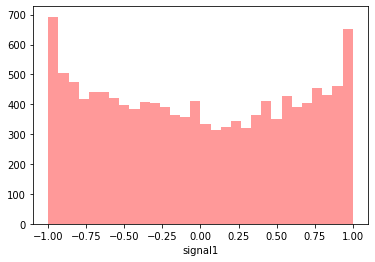

In [85]:
sns.distplot(data['signal1'], kde = False, color ='red', bins = 30) 

# SIGNAL2 (need move_1D & move_3D)